## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
display(torch.cuda.is_available())
display(torch.backends.cudnn.enabled)

True

True

In [4]:
PATH = f'/home/{os.environ["USER"]}/data/loc-newspaper/'
# images_root = f'{data_root}images/'


In [5]:
ls {PATH}

images/           images.zip     img_metadata.json      labels.csv
images-modified/  img_mdata.csv  img_metadata.json.bak  tmp/


In [6]:
from fastai.plots import plots_from_files

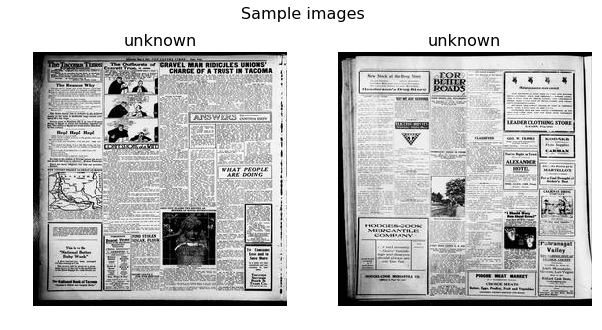

In [7]:
list_paths = [f'{PATH}images-modified/0016af005540341d896923265a80c3b6.jpg', f'{PATH}images-modified/002d4d8d6a00aea0eb5c0db25feef011.jpg']
titles=["unknown", "unknown"]
plots_from_files(list_paths, titles=titles, maintitle="Sample images")

In [8]:
label_csv = f'{PATH}labels.csv'

In [9]:
import pandas as pd
pd.read_csv(label_csv).head()

,id,labels
0,0016af005540341d896923265a80c3b6,map
1,002d4d8d6a00aea0eb5c0db25feef011,photograph
2,00315cd56b0932d1a2511a5a5c408b79,illustration
3,004c143ad20bc6ec664eb9368b763e20,photograph illustration
4,006aed5b166ab85682ccdd7c86f80bd0,photograph


In [10]:
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [11]:
def get_data(sz, bs=64):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(
        PATH,
        'images-modified',
        label_csv,
        bs=bs,
        tfms=tfms,
        suffix='.jpg',
        val_idxs=val_idxs
    )

In [12]:
arch = resnet34

In [13]:
data = get_data(256)

In [14]:
sz = 64
bs = 16
data = get_data(sz, bs)

In [15]:
data = data.resize(int(sz * 1.3), 'tmp') # resize images for speed later

In [40]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [41]:
# lrf = learn.lr_find()
# learn.sched.plot()

In [42]:
lr = 0.2 # choose lr where loss is still clearly improving

In [45]:
learn.precompute=False
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.257694   0.265989   0.888889  
    1      0.263771   0.27379    0.888235                  
    2      0.257756   0.273612   0.888235                  
    3      0.258908   0.289518   0.883007                  
    4      0.264261   0.274347   0.884967                  
    5      0.258821   0.272722   0.885621                  
    6      0.246578   0.275901   0.886275                  



[array([0.2759]), 0.8862745100376652]

In [46]:
learn.precompute=False
lrs = [lr / 6, lr / 3, lr]
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.325512   0.29602    0.883007  
    1      0.307841   0.281535   0.890196                  
    2      0.28338    0.268213   0.893464                  
    3      0.282312   0.269212   0.89085                   
    4      0.267293   0.258738   0.900654                  
    5      0.256184   0.247526   0.898039                  
    6      0.245477   0.24431    0.903268                  



[array([0.24431]), 0.9032679716746013]

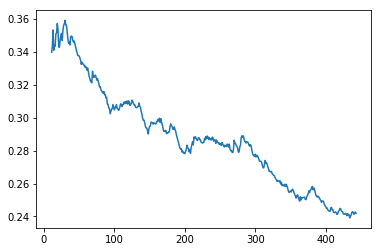

In [47]:
learn.sched.plot_loss()

In [48]:
learn.save('64')

In [57]:
# learn.precompute=False
# learn.load('64')

In [55]:
sz=128

learn.precompute=False
learn.set_data(get_data(sz, bs))
learn.freeze()

In [58]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.297878   0.286235   0.882353  
    1      0.295947   0.280794   0.884314                  
    2      0.291473   0.280943   0.885621                  
    3      0.292983   0.277964   0.881046                  
    4      0.292341   0.281633   0.888889                  
    5      0.286734   0.275571   0.887582                  
    6      0.28321    0.279329   0.885621                  



[array([0.27933]), 0.8856209179934333]

In [59]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.275868   0.255916   0.895425  
    1      0.269391   0.264494   0.886275                  
    2      0.259499   0.235407   0.905882                  
    3      0.258714   0.239397   0.90719                   
    4      0.250718   0.243136   0.898693                  
    5      0.232112   0.219626   0.913072                  
    6      0.219949   0.220533   0.910458                  



[array([0.22053]), 0.9104575201576831]

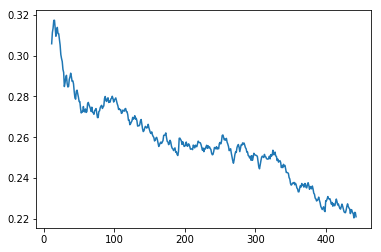

In [60]:
learn.sched.plot_loss()

In [61]:
learn.save('128')

In [85]:
learn.precompute=False
learn.load('128')

In [86]:
sz=256

learn.precompute=False
learn.set_data(get_data(sz, bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.267175   0.258696   0.895425  
    1      0.27118    0.265873   0.893464                  
    2      0.267845   0.256097   0.898039                  
    3      0.266701   0.255472   0.898039                  
    4      0.261432   0.251743   0.898039                  
    5      0.258943   0.249665   0.898693                  
    6      0.254689   0.250505   0.897386                  



[array([0.2505]), 0.8973856208371181]

In [87]:
lrs = [lr / 6, lr / 3, lr]
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.252572   0.230397   0.909804  
    1      0.25241    0.220912   0.915033                  
    2      0.234232   0.215291   0.919608                  
    3      0.242648   0.347189   0.847059                  
    4      0.227115   0.229549   0.903922                  
    5      0.202909   0.202204   0.918301                  
    6      0.185833   0.201189   0.920915                  



[array([0.20119]), 0.9209150253557692]

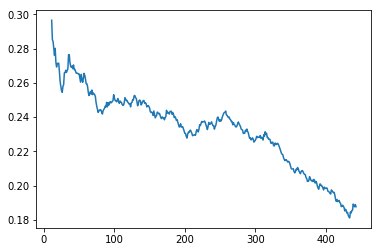

In [88]:
learn.sched.plot_loss()

In [89]:
learn.save('256')

In [81]:
from sklearn.metrics import fbeta_score

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

In [82]:
probs = learn.predict()
f2(probs, data.val_y)

0.8299184475655065

In [83]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

f2(preds,y)

0.8306739012621366

### End